#**Naive Bayes Classifier**

##AIM: Implementation of NaiveBayes Algorithm

In [ ]:
import numpy as np
import pandas as pd

A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem.

 **Bayes Theorem:**

Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.

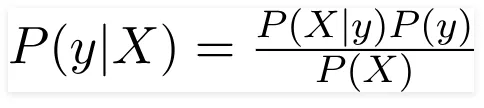



The variable y is the class variable. Variable X represent the parameters/features.

X is given as,

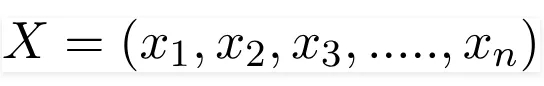

Here x_1,x_2….x_n represent the features. By substituting for X and expanding using the chain rule we get,

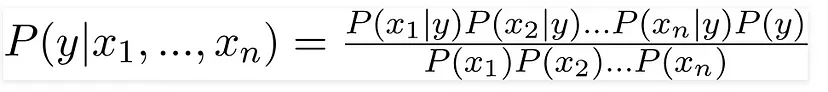

**Types of Naive Bayes Classifier:**

Multinomial Naive Bayes:

This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.

Bernoulli Naive Bayes:

This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.

Gaussian Naive Bayes:

When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.

# **GET DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/MachineLearning/09-01-2023/data.csv"

Mounted at /content/drive


In [ ]:
df=pd.read_csv(path)
df

,OUTLOOK,TEMP,HUMIDITY,WIND,PLAY TENNIES
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes


In [ ]:
# y=df.loc["PLAY TENNIES"=="yes",-1]
y=df[df["PLAY TENNIES"]=="yes"]
# y=df["PLAY TENNIES"].unique()
y=df["PLAY TENNIES"]
type(y)
# y[y.values=="yes"]
# y[y.iloc[:,1]=="hot"]

pandas.core.series.Series

In [ ]:
class NaiveBias:

  def fit(self,x,y):
    self.x=x
    self.y=y
    self.target_val=y.unique()
  
  def predict(self,x):
    maxi=0
    final_op=self.target_val[0]
    for val in self.target_val:
      p=1
      for i,v in x.items():
        tot=len(self.x[(self.x[i].values==v.values) & (self.x.iloc[:,-1].values==val)])
        # print(tot)
        res=self.x[self.x[i].values==v.values]
        # print(res)
        p*=(tot/len(res))  
        # print(self.x[i])
        # print(p)
      if maxi<p:
        # print("M")
        maxi=p
        final_op=val
        p=1

    return final_op


In [ ]:
train=df
target=df.iloc[:,-1]
r=np.random.randint(0,len(train),1)
print(r)
test=train.loc[r]
# print(train)
print(f'Test : \n',test)
model=NaiveBias()
model.fit(train,target)
print("\n Predicted Output :",end=" ")
model.predict(test)

[3]
Test : 
   OUTLOOK  TEMP HUMIDITY  WIND PLAY TENNIES
3    rain  mild     high  weak          yes

 Predicted Output : 

'yes'